In [16]:
# Reading the Walmart dataset and displaying first 10 rows
import pandas as pd
import numpy as np
walmart_sales = pd.read_csv('C:/Users/sweth/Desktop/ASU_IT/Fall 2022/IFT 512 - Advanced Big data Analysis/Project/walmart-sales-dataset-of-45stores.csv')
walmart_sales.head(10)

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,05-02-2010,1643690.900,0,42.310,2.572,211.096,8.106
1,1,12-02-2010,1641957.440,1,38.510,2.548,211.242,8.106
2,1,19-02-2010,1611968.170,0,39.930,2.514,211.289,8.106
3,1,26-02-2010,1409727.590,0,46.630,2.561,211.320,8.106
4,1,05-03-2010,1554806.680,0,46.500,2.625,211.350,8.106
5,1,12-03-2010,1439541.590,0,57.790,2.667,211.381,8.106
6,1,19-03-2010,1472515.790,0,54.580,2.720,211.216,8.106
7,1,26-03-2010,1404429.920,0,51.450,2.732,211.018,8.106
8,1,02-04-2010,1594968.280,0,62.270,2.719,210.820,7.808
9,1,09-04-2010,1545418.530,0,65.860,2.770,210.623,7.808


In [17]:
# Define Basic Functions
def get_metadata(dataframe):
    print("\nBASIC INFORMATION\n")
    print(dataframe.info())
    print("=" * 100)
    print("STATISTICAL INFORMATION")
    display(dataframe.describe(include='all'))
    print("=" * 100)
    print("Dataframe Shape\n", dataframe.shape)
    print("=" * 100)
    print("Number of Duplicate Rows\n", dataframe.duplicated().sum())
    print("=" * 100)
    print("NULL Values Check")
    for col in dataframe.columns:
        print(col, dataframe[col].isnull().sum())
    print("=" * 100)
    print("Sample Data")
    display(dataframe.head(3))
    print("=" * 100)

In [18]:
get_metadata(walmart_sales)


BASIC INFORMATION

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6435 entries, 0 to 6434
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Store         6435 non-null   int64  
 1   Date          6435 non-null   object 
 2   Weekly_Sales  6435 non-null   float64
 3   Holiday_Flag  6435 non-null   int64  
 4   Temperature   6435 non-null   float64
 5   Fuel_Price    6435 non-null   float64
 6   CPI           6435 non-null   float64
 7   Unemployment  6435 non-null   float64
dtypes: float64(5), int64(2), object(1)
memory usage: 402.3+ KB
None
STATISTICAL INFORMATION


,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
count,6435.000,6435,6435.000,6435.000,6435.000,6435.000,6435.000,6435.000
unique,NaN,143,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,05-02-2010,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,45,NaN,NaN,NaN,NaN,NaN,NaN
mean,23.000,NaN,1046964.878,0.070,60.664,3.359,171.578,7.999
std,12.988,NaN,564366.622,0.255,18.445,0.459,39.357,1.876
min,1.000,NaN,209986.250,0.000,-2.060,2.472,126.064,3.879
25%,12.000,NaN,553350.105,0.000,47.460,2.933,131.735,6.891
50%,23.000,NaN,960746.040,0.000,62.670,3.445,182.617,7.874
75%,34.000,NaN,1420158.660,0.000,74.940,3.735,212.743,8.622


Dataframe Shape
 (6435, 8)
Number of Duplicate Rows
 0
NULL Values Check
Store 0
Date 0
Weekly_Sales 0
Holiday_Flag 0
Temperature 0
Fuel_Price 0
CPI 0
Unemployment 0
Sample Data


,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,05-02-2010,1643690.900,0,42.310,2.572,211.096,8.106
1,1,12-02-2010,1641957.440,1,38.510,2.548,211.242,8.106
2,1,19-02-2010,1611968.170,0,39.930,2.514,211.289,8.106


array([<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>,
       <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>], dtype=object)

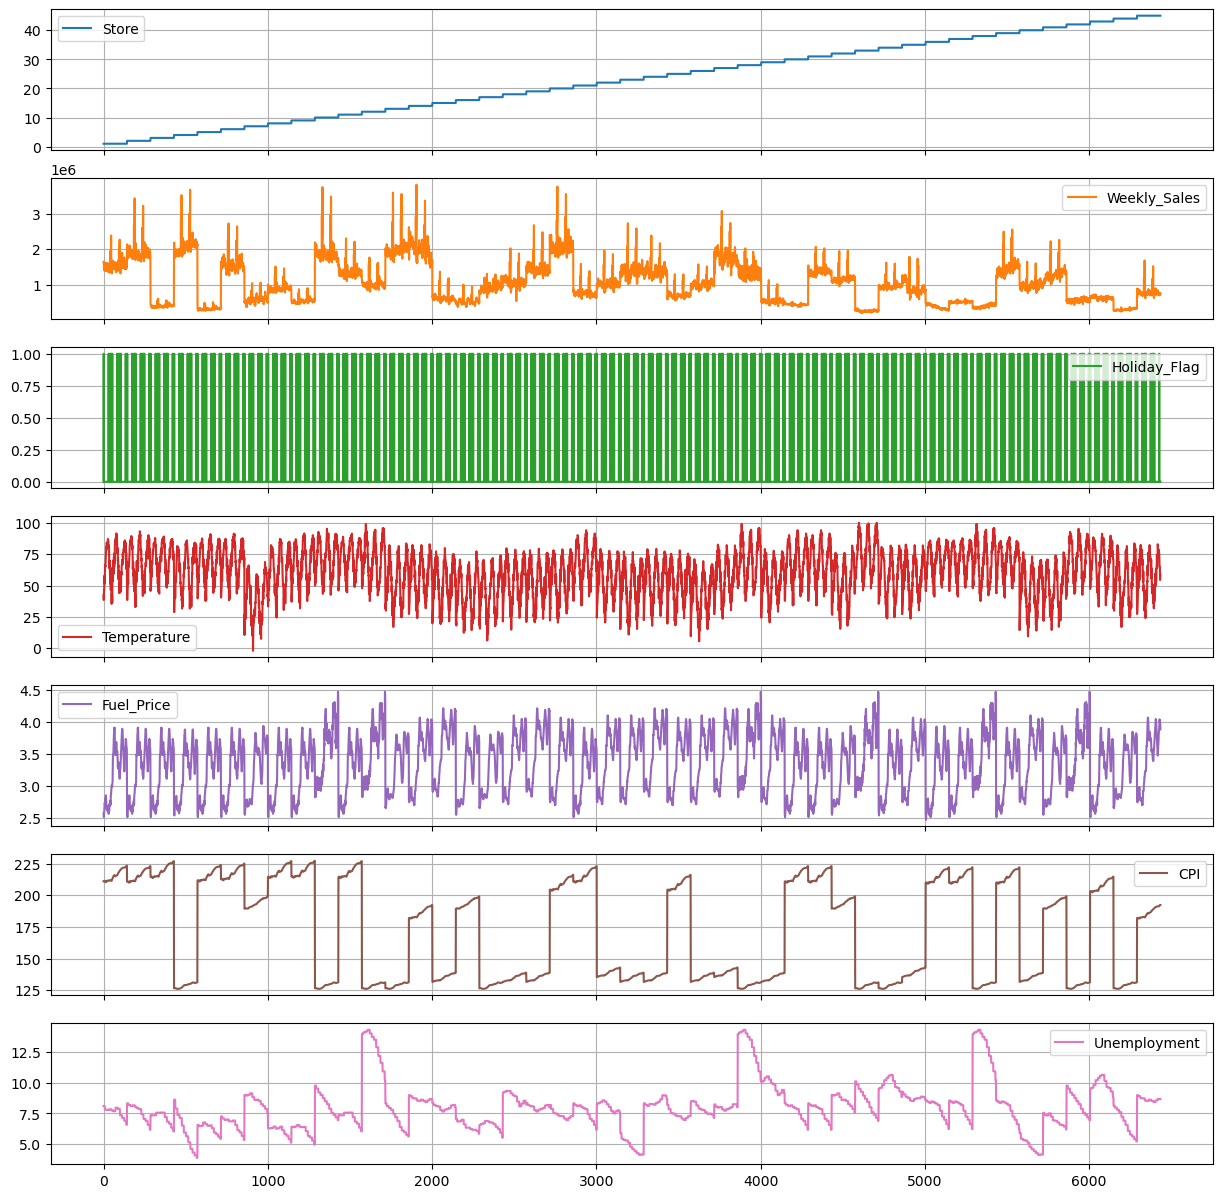

In [19]:
# Value Distribution 
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

pd.set_option('display.float_format', lambda x: '%.3f' % x)
walmart_sales.plot(subplots=True, grid=True, figsize=(15,15))

<AxesSubplot:xlabel='Store', ylabel='Weekly_Sales'>

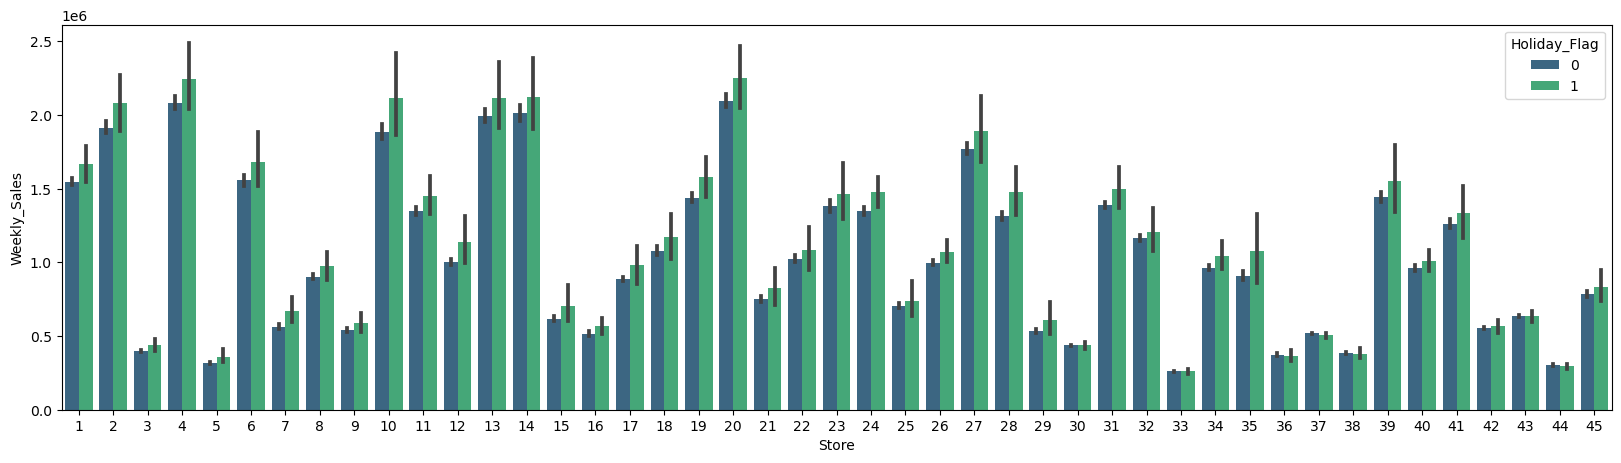

In [20]:
# Display stores and their weekly sales

fig, ax = plt.subplots(figsize=(20,5))
sns.barplot(data=walmart_sales, x="Store", y="Weekly_Sales", hue="Holiday_Flag", ax=ax, palette = "viridis")

In [21]:
#Q1. The store with Maximum Weekly Sales

store_sales_df = walmart_sales.groupby(['Store'], 
                                  as_index=False).agg(Sum_of_Weekly_Sales=('Weekly_Sales','sum'))
store_sales_df[(store_sales_df['Sum_of_Weekly_Sales'] == max(store_sales_df['Sum_of_Weekly_Sales']))]

,Store,Sum_of_Weekly_Sales
19,20,301397792.460


 
 *******Que1 Results : Store 20 has the Maximum Weekly Sales*****


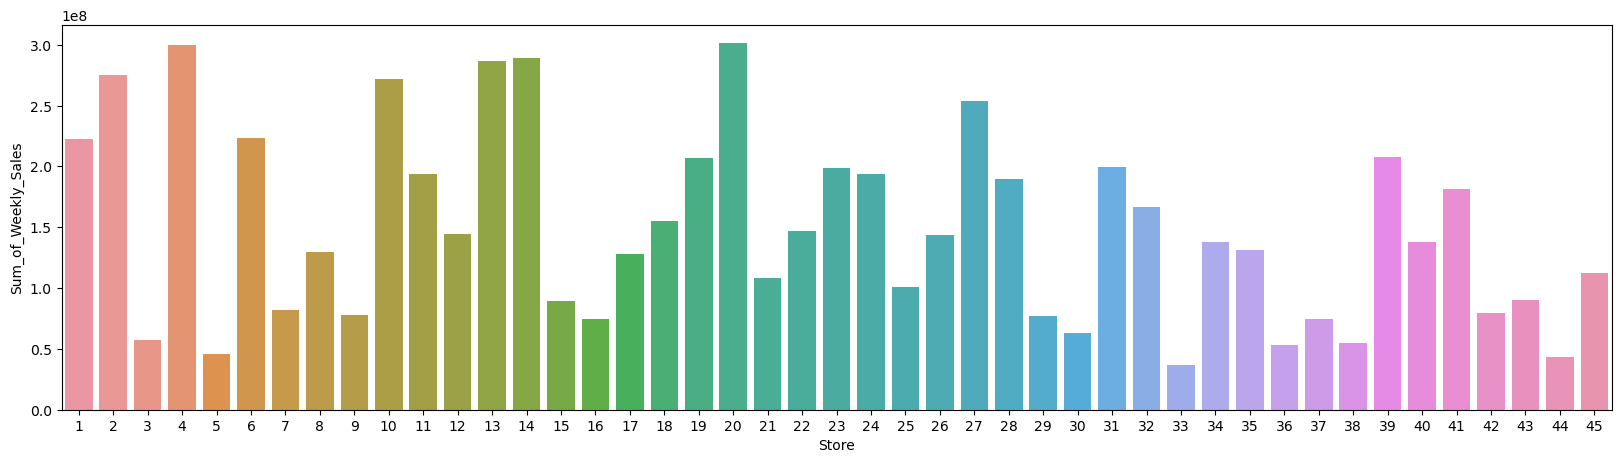

In [39]:
# Visual representation of Weekly sales - Store 20 with max

fig, ax = plt.subplots(figsize=(20,5))
sns.barplot(data=store_sales_df, x="Store", y="Sum_of_Weekly_Sales", ax=ax)

#Conclusion : Store 20 has the Maximum Weekly Sales
print(" \n *******Que1 Results : Store 20 has the Maximum Weekly Sales*****")

In [23]:
#Q2: Store in which the Weekly Sales vary alot
# In this case, our objective is to find the Maximum Standard Deviation of Weekly Sales

std_stores = walmart_sales.groupby('Store', as_index=False).agg(Std_of_Weekly_Sales=('Weekly_Sales','std'))
std_stores[(std_stores['Std_of_Weekly_Sales'] == max(std_stores['Std_of_Weekly_Sales']))]

,Store,Std_of_Weekly_Sales
13,14,317569.949


 
 *******Que2 Result: The Weekly Sales vary a lot in Store 14*****


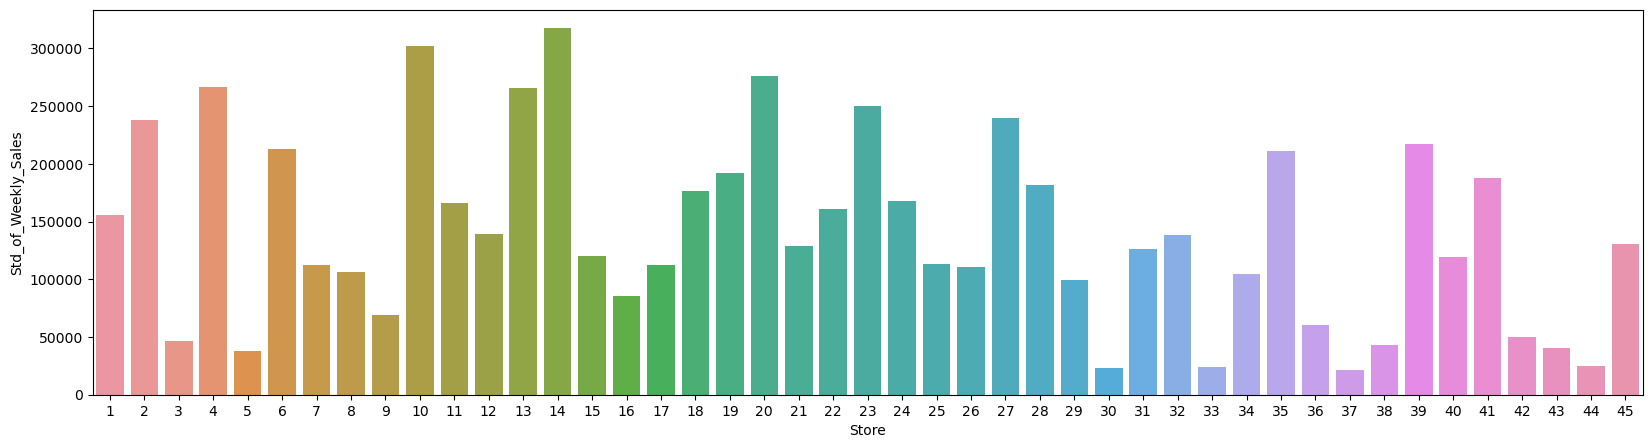

In [40]:
# Visual representation of Weekly sales - Q2.Store 14 

fig, ax = plt.subplots(figsize=(20,5))
sns.barplot(data=std_stores, x="Store", y="Std_of_Weekly_Sales", ax=ax)

#Conclusion : The Weekly Sales vary a lot in Store 14
print(" \n *******Que2 Result: The Weekly Sales vary a lot in Store 14*****")

In [25]:
#Add a column for Coefficient of Variation
stats_df = walmart_sales.groupby('Store', as_index=False).agg(Sales_sum=('Weekly_Sales','sum'), 
                                        Mean_Sales=('Weekly_Sales','mean'), 
                                        Std_Sales=('Weekly_Sales', 'std'),
                                        Sales_Variance=('Weekly_Sales','var'))
stats_df


,Store,Sales_sum,Mean_Sales,Std_Sales,Sales_Variance
0,1,222402808.850,1555264.398,155980.768,24329999911.373
1,2,275382440.980,1925751.336,237683.695,56493538717.591
2,3,57586735.070,402704.441,46319.632,2145508267.568
3,4,299543953.380,2094712.961,266201.442,70863207880.991
4,5,45475688.900,318011.810,37737.966,1424154058.552
5,6,223756130.640,1564728.186,212525.856,45167239409.866
6,7,81598275.140,570617.309,112585.469,12675487879.440
7,8,129951181.130,908749.518,106280.830,11295614800.176
8,9,77789218.990,543980.552,69028.667,4764956810.464
9,10,271617713.890,1899424.573,302262.063,91362354429.463


In [26]:
stats_df['Coeff_of_Variation'] = (stats_df['Std_Sales'] / stats_df['Mean_Sales']) * 100
stats_df

,Store,Sales_sum,Mean_Sales,Std_Sales,Sales_Variance,Coeff_of_Variation
0,1,222402808.850,1555264.398,155980.768,24329999911.373,10.029
1,2,275382440.980,1925751.336,237683.695,56493538717.591,12.342
2,3,57586735.070,402704.441,46319.632,2145508267.568,11.502
3,4,299543953.380,2094712.961,266201.442,70863207880.991,12.708
4,5,45475688.900,318011.810,37737.966,1424154058.552,11.867
5,6,223756130.640,1564728.186,212525.856,45167239409.866,13.582
6,7,81598275.140,570617.309,112585.469,12675487879.440,19.730
7,8,129951181.130,908749.518,106280.830,11295614800.176,11.695
8,9,77789218.990,543980.552,69028.667,4764956810.464,12.690
9,10,271617713.890,1899424.573,302262.063,91362354429.463,15.913


In [27]:
#Q3: Identify the Store with Good Quarterly Growth Rate in Q3'2012

walmart_sales['Year'] = pd.to_datetime(walmart_sales['Date'], format="%d-%m-%Y").dt.year
walmart_sales['Month'] = pd.to_datetime(walmart_sales['Date'], format="%d-%m-%Y").dt.month

In [28]:
def assign_quarter_category(month):
    if month <= 3:
        return 'Q1'
    elif month >= 4 and month <= 6:
        return 'Q2'
    elif month >=7 and month <= 9:
        return 'Q3'
    elif month >= 10 and month <= 12:
        return 'Q4'
    else:
        return np.nan

In [30]:
walmart_sales['Quarter'] = walmart_sales['Month'].apply(assign_quarter_category)
walmart_sales

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,Year,Month,Quarter
0,1,05-02-2010,1643690.900,0,42.310,2.572,211.096,8.106,2010,2,Q1
1,1,12-02-2010,1641957.440,1,38.510,2.548,211.242,8.106,2010,2,Q1
2,1,19-02-2010,1611968.170,0,39.930,2.514,211.289,8.106,2010,2,Q1
3,1,26-02-2010,1409727.590,0,46.630,2.561,211.320,8.106,2010,2,Q1
4,1,05-03-2010,1554806.680,0,46.500,2.625,211.350,8.106,2010,3,Q1
...,...,...,...,...,...,...,...,...,...,...,...
6430,45,28-09-2012,713173.950,0,64.880,3.997,192.014,8.684,2012,9,Q3
6431,45,05-10-2012,733455.070,0,64.890,3.985,192.170,8.667,2012,10,Q4
6432,45,12-10-2012,734464.360,0,54.470,4.000,192.327,8.667,2012,10,Q4
6433,45,19-10-2012,718125.530,0,56.470,3.969,192.331,8.667,2012,10,Q4


In [31]:
# Dropping the columns month and year.Display only the 2012'Quarter
walmart_sales_2012 = walmart_sales[(walmart_sales['Year']) == 2012]
walmart_sales_2012.drop(['Month', 'Year'], axis='columns', inplace=True)
walmart_sales_2012

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,Quarter
100,1,06-01-2012,1550369.920,0,49.010,3.157,219.714,7.348,Q1
101,1,13-01-2012,1459601.170,0,48.530,3.261,219.893,7.348,Q1
102,1,20-01-2012,1394393.840,0,54.110,3.268,219.986,7.348,Q1
103,1,27-01-2012,1319325.590,0,54.260,3.290,220.079,7.348,Q1
104,1,03-02-2012,1636339.650,0,56.550,3.360,220.172,7.348,Q1
...,...,...,...,...,...,...,...,...,...
6430,45,28-09-2012,713173.950,0,64.880,3.997,192.014,8.684,Q3
6431,45,05-10-2012,733455.070,0,64.890,3.985,192.170,8.667,Q4
6432,45,12-10-2012,734464.360,0,54.470,4.000,192.327,8.667,Q4
6433,45,19-10-2012,718125.530,0,56.470,3.969,192.331,8.667,Q4


In [32]:
walmart_sales_2012.describe(include='all')

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,Quarter
count,1935.000,1935,1935.000,1935.000,1935.000,1935.000,1935.000,1935.000,1935
unique,NaN,43,NaN,NaN,NaN,NaN,NaN,NaN,4
top,NaN,06-01-2012,NaN,NaN,NaN,NaN,NaN,NaN,Q1
freq,NaN,45,NaN,NaN,NaN,NaN,NaN,NaN,585
mean,23.000,NaN,1033660.392,0.047,63.362,3.710,175.499,7.348,NaN
std,12.991,NaN,536653.456,0.211,16.945,0.277,40.681,1.699,NaN
min,1.000,NaN,236920.490,0.000,7.460,3.031,130.158,3.879,NaN
25%,12.000,NaN,558529.365,0.000,52.060,3.545,136.753,6.228,NaN
50%,23.000,NaN,960476.100,0.000,65.540,3.717,190.462,7.147,NaN
75%,34.000,NaN,1426382.955,0.000,76.575,3.891,220.489,8.253,NaN


In [33]:
# Quarter-wise sales-2012
q_sales = walmart_sales_2012.groupby(["Store", "Quarter"]).agg(Quarterwise_Sales=('Weekly_Sales', 'sum'))
q_sales

Quarterwise_Sales
Store Quarter                   
1     Q1            20723762.830
      Q2            20978760.120
      Q3            20253947.780
      Q4             6245587.290
2     Q1            24528220.700
...                          ...
44    Q4             1360020.410
45    Q1             9805267.570
      Q2            10390767.830
      Q3             9581268.380
      Q4             2946326.390

[180 rows x 1 columns]

<AxesSubplot:xlabel='Store,Quarter'>

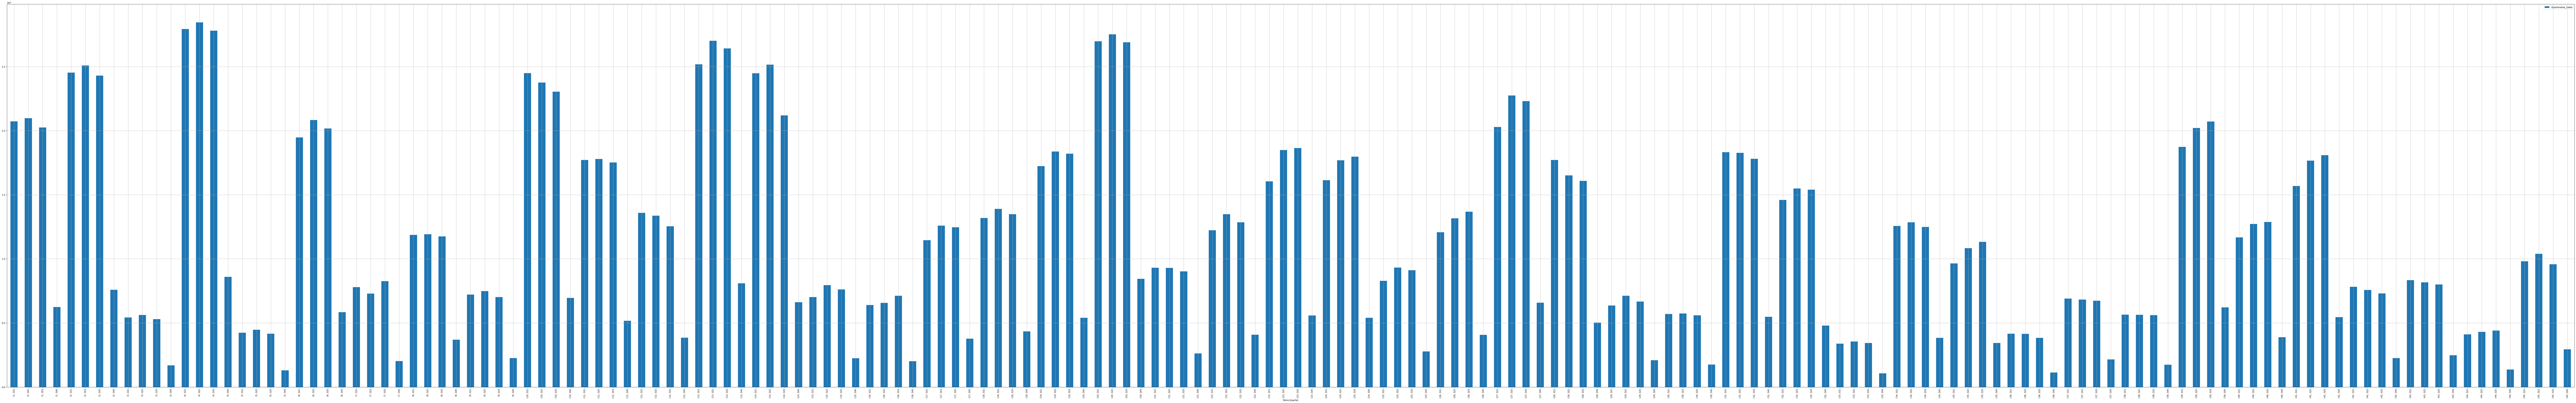

In [34]:
q_sales.plot(kind = 'bar', grid=True, figsize=(200, 30))

In [35]:
# Display only the data of Q3
quarterly_percentage = q_sales.groupby(level=0).apply(lambda x: 100 * x / float(x.sum()))
quarterly_percentage.reset_index(inplace=True)
Q3 = quarterly_percentage[(quarterly_percentage['Quarter']) == 'Q3']
Q3

,Store,Quarter,Quarterwise_Sales
2,1,Q3,29.697
6,2,Q3,29.821
10,3,Q3,29.393
14,4,Q3,29.963
18,5,Q3,29.387
22,6,Q3,30.411
26,7,Q3,32.572
30,8,Q3,29.946
34,9,Q3,29.291
38,10,Q3,29.449


In [36]:
# Which stores have the maximum quarterly growth rate (Q3’2012)?
Q3[(Q3['Quarterwise_Sales'] == max(Q3['Quarterwise_Sales']))]

,Store,Quarter,Quarterwise_Sales
26,7,Q3,32.572


 
 *******Que3 Results : Store 7 has Good Quarterly Growth Rate in Q3' 2012*****


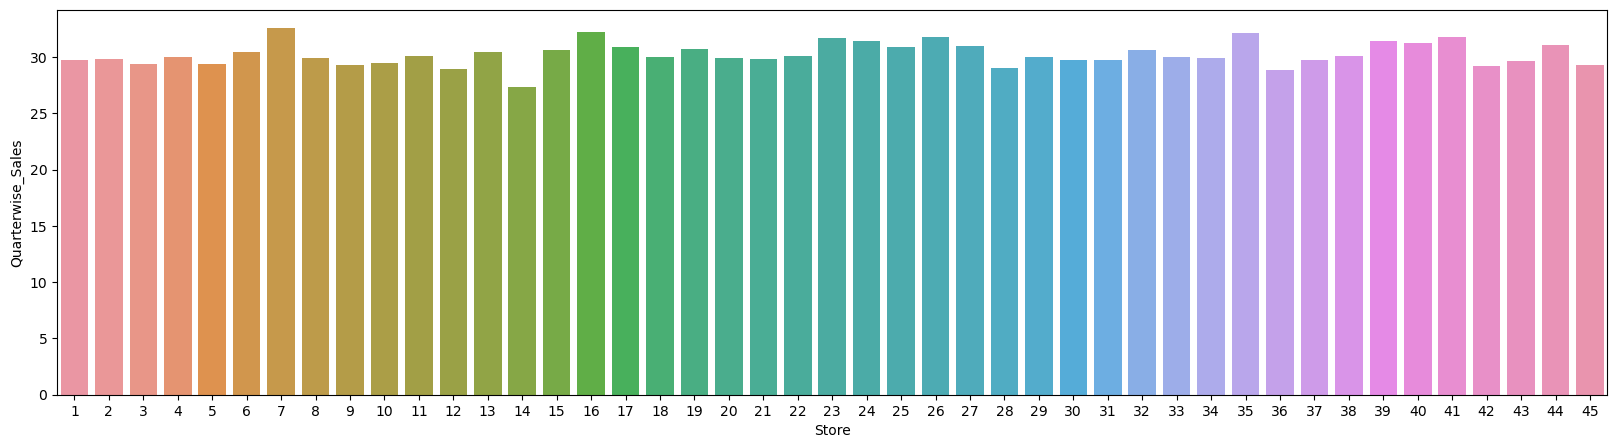

In [38]:
# Visual Representation
fig, ax = plt.subplots(figsize=(20,5))
sns.barplot(data=Q3, x="Store", y="Quarterwise_Sales", ax=ax)

#Conclusion : Store 7 has Good Quarterly Growth Rate in Q3' 2012
print(" \n *******Que3 Results : Store 7 has Good Quarterly Growth Rate in Q3' 2012*****")


In [41]:
#Q4:Some holidays have a negative impact on sales. Find out the holidays which have higher sales than
#the mean sales in the non-holiday season for all stores together.

def assign_holiday(date):
    if date in ['12-02-2010', '11-02-2011', '10-02-2012', '08-02-2013']:
        return 'Super Bowl'
    elif date in ['10-09-2010', '09-09-2011', '07-09-2012', '06-09-2013']:
        return 'Labour Day'
    elif date in ['26-11-2010', '25-11-2011', '23-11-2012', '29-11-2013']:
        return 'Thanksgiving'
    elif date in ['31-12-2010', '30-12-2011', '28-12-2012', '27-12-2013']:
        return 'Christmas'
    else:
        return 'Non-Holiday' 
    
holiday_analysis_df = walmart_sales.drop(['Store', 'Year', 'Month'], axis='columns')
holiday_analysis_df['Holiday'] = holiday_analysis_df['Date'].apply(assign_holiday)
holiday_analysis_df

,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,Quarter,Holiday
0,05-02-2010,1643690.900,0,42.310,2.572,211.096,8.106,Q1,Non-Holiday
1,12-02-2010,1641957.440,1,38.510,2.548,211.242,8.106,Q1,Super Bowl
2,19-02-2010,1611968.170,0,39.930,2.514,211.289,8.106,Q1,Non-Holiday
3,26-02-2010,1409727.590,0,46.630,2.561,211.320,8.106,Q1,Non-Holiday
4,05-03-2010,1554806.680,0,46.500,2.625,211.350,8.106,Q1,Non-Holiday
...,...,...,...,...,...,...,...,...,...
6430,28-09-2012,713173.950,0,64.880,3.997,192.014,8.684,Q3,Non-Holiday
6431,05-10-2012,733455.070,0,64.890,3.985,192.170,8.667,Q4,Non-Holiday
6432,12-10-2012,734464.360,0,54.470,4.000,192.327,8.667,Q4,Non-Holiday
6433,19-10-2012,718125.530,0,56.470,3.969,192.331,8.667,Q4,Non-Holiday


In [46]:
#Finding the overall sales on holidays
mean_df = holiday_analysis_df.groupby('Holiday').agg(Mean_Weekly_Sales=('Weekly_Sales','mean'))
mean_df

#Que4 Results: Labour Day Week, Super Bowl Week and Thanksgiving Week have negative impact on Sales, 
#which means they have higher sales than the Mean of Non-Holiday Week sales*****")


,Mean_Weekly_Sales
Holiday,
Christmas,960833.112
Labour Day,1042427.294
Non-Holiday,1041256.380
Super Bowl,1079127.988
Thanksgiving,1471273.428


In [ ]:
mean_df.plot(kind='bar', y='Mean_Weekly_Sales', figs

<AxesSubplot:xlabel='Holiday'>

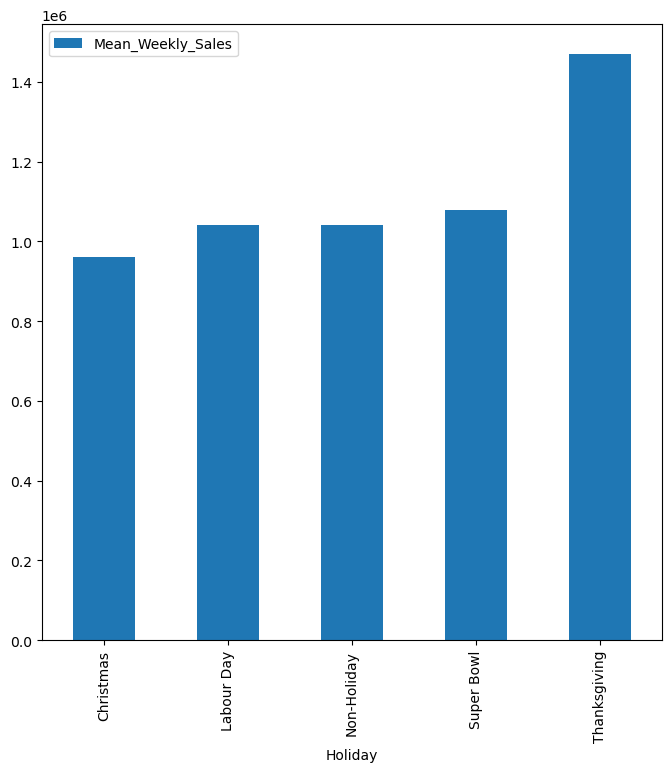

In [48]:
#Grouping the sales by Quarter and check for the sales on holidays
holiday_analysis_df.groupby('Quarter').agg({'Weekly_Sales':'std'})
pd.pivot_table(holiday_analysis_df, index=["Quarter",'Holiday'], aggfunc={'Weekly_Sales':np.mean})

Weekly_Sales
Quarter Holiday                   
Q1      Non-Holiday     998837.001
        Super Bowl     1079127.988
Q2      Non-Holiday    1040806.407
Q3      Labour Day     1042427.294
        Non-Holiday    1021696.505
Q4      Christmas       960833.112
        Non-Holiday    1115843.259
        Thanksgiving   1471273.428

In [49]:
#SUM OF WEEKLY SALES IS HIGHER IN NON-HOLIDAY WEEKS
pd.pivot_table(holiday_analysis_df, index=["Holiday_Flag"], aggfunc={'Weekly_Sales':'sum', 'CPI':np.mean})


,CPI,Weekly_Sales
Holiday_Flag,,
0,171.602,6231919435.550
1,171.268,505299551.560


In [50]:
#Q5: Which quarter has the highest and lowest unemployment rate?
q_unemp = walmart_sales.groupby('Quarter', as_index=False).agg(Mean_Unemployment_Rate=('Unemployment','mean'))
q_unemp

,Quarter,Mean_Unemployment_Rate
0,Q1,8.062
1,Q2,8.022
2,Q3,7.926
3,Q4,7.998


Q1 has higher Unemployment Rate and Q3 has lower Unemployment Rate


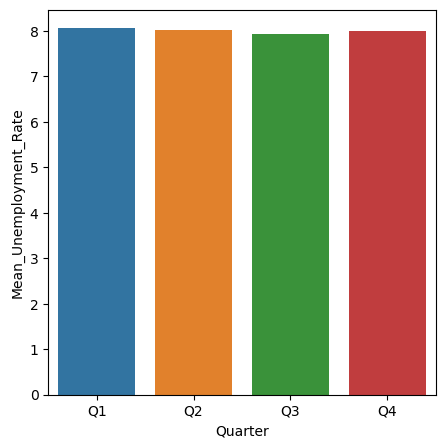

In [52]:
#Visual Representation
fig, ax = plt.subplots(figsize=(5,5))
sns.barplot(data=q_unemp, x="Quarter", y="Mean_Unemployment_Rate", ax=ax)

#Consultion/Results
print("Q1 has higher Unemployment Rate and Q3 has lower Unemployment Rate")